<h3> Problem 3 </h3>   
In a study on CHD (coronary heart disease), 200 individuals from each of the six age groups were taken,and presence or absence of CHD of each sample individual was recorded. The following data were obtained.    


|         |    CHD   |        |
|:-------:|:--------:|:------:|
|   Age   |  Present | Absent |
| [25,35] |    10    |   190  |
| [35,45] |    23    |   177  |
| [45,55] |    71    |   129  |
| [55,65] |    133   |   67   |
| [65,75] |    179   |   21   |
| [75,85] |    191   |    6   |
   
The model is $\pi'(X) =\beta_0+\beta_1X$, where X=age,$\pi(X)$ is the proportion with CHD present at age X,and $\pi'(X)$ is the logit of $\pi(X)$.   

A logistic regression model was fitted using the R command:   
glm(cbind(Present,Absent)~Age,family='binomial'),and the following were obtained:$\hat{\beta}_0=-7.0593;\hat{\beta}_1= 0.12918;s(\hat{\beta}_0) = 0.38350;s(\hat{\beta}_1) = 0.00685$.

(a) Obtain the sample proportion of individuals who have CHD for each of the age groups.

In [12]:
library(repr)
beta_0 = −7.0593; beta_1 = 0.12918; s_beta_0 = 0.38350; s_beta_1 = 0.00685
Age = c(30, 40, 50,60,75,80);Present = c(10,23,71,133,179,191);Absent = c(190,177,129,67,21,6)
data = data.frame(Age, Present, Absent)
for (i in 1:nrow(data)){
    print(paste("Sample proportion of individuals who have CHD for group ",i," is ",data$Present[i]/(data$Present[i]+data$Absent[i])))
}

[1] "Sample proportion of individuals who have CHD for group  1  is  0.05"
[1] "Sample proportion of individuals who have CHD for group  2  is  0.115"
[1] "Sample proportion of individuals who have CHD for group  3  is  0.355"
[1] "Sample proportion of individuals who have CHD for group  4  is  0.665"
[1] "Sample proportion of individuals who have CHD for group  5  is  0.895"
[1] "Sample proportion of individuals who have CHD for group  6  is  0.969543147208122"


(b) Plot the sample proportions as well as the fitted proportions against age X on the same graph. Also plot the logit of sample proportions as well as fitted logistic regression against age on the same graph. Summarize your findings.

$logit(\hat{\pi}(X))= \hat{\beta}_0+\hat{\beta}_1X$ and $\hat{\pi}(X)= \frac{e^{(\hat{\beta}_0+\hat{\beta}_1X)}}{1+e^{(\hat{\beta_0}+\hat{\beta_1}X)}}=\frac{1}{1+e^{-(\hat{\beta_0}+\hat{\beta_1}X)}}$

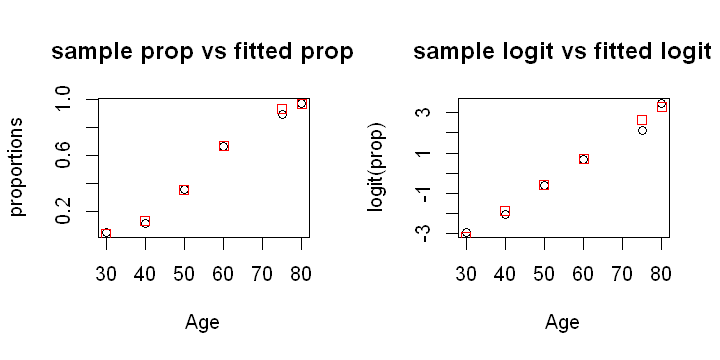

In [16]:
par(mfrow = c(1,2))
options(repr.plot.width=6, repr.plot.height=3)
plot(Age,pi_s,main="sample prop vs fitted prop",ylab = "proportions")
points(Age,1/(1+exp(-(beta_0+beta_1*Age))),col="red",pch=0)
plot(Age,log(pi_s / (1-pi_s)),main="sample logit vs fitted logit",,ylab = "logit(prop)")
points(Age,beta_0+beta_1*Age,col="red",pch=0)

From the plot, we can find it fittes well.    
The sample proportion looks like a S shape and It looks more linearer after transformation.

c) Obtain an approximate 99% confidence interval for $\beta_1$. Use this confidence interval to test the hypothesis $H_0:\beta_1= 0$ against $H_1:\beta_1 \not = 0 $ at level $\alpha= 0.01$.

In [11]:
alpha = 0.01;z = qnorm(1-alpha/2)
print(paste("C.I. for beta_1 is (",beta_1-z*s_beta_1,",",beta_1+z*s_beta_1,")",sep = ""))

[1] "C.I. for beta_1 is (0.11153556927069,0.14682443072931)"


Since 0 is not in the Confidence Interval, we fail to reject $H_0$

(d) It is desired to obtain an approximate confidence interval for $\pi(67)$. The SE for $logit(\hat{\pi}(67))$ turns out tobe 0.11757. Use this information to obtain an approximate 99% confidence interval for $\pi(67)$. [Hint: First obtain a 99% confidence interval for $logit(\pi(67))$.

In [13]:
logit_67 = beta_0+beta_1*67
s_logit_67 = 0.11757
logit_l = logit_67-z*s_logit_67;logit_h = logit_67+z*s_logit_67
print(paste("C.I. for logit(pi(67)) is (",logit_l,",",logit_h,")",sep = ""))

[1] "C.I. for logit(pi(67)) is (1.29291974878175,1.89860025121824)"


In [14]:
p_l = exp(beta_0+beta_1*logit_l)/(1+exp(beta_0+beta_1*logit_l));
p_h = exp(beta_0+beta_1*logit_h)/(1+exp(beta_0+beta_1*logit_h))
print(paste("C.I. for pi(67)) is (",p_l,",",p_h,")",sep = ""))

[1] "C.I. for pi(67)) is (0.00101456461780401,0.00109704347768233)"
